In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 3. Calculate stress at each fringe location for unnotched beam, plot stress vs. fringe order. Find fringe constant

In [2]:
thickness = 0.2165 #in
I_moment = (1/12)*thickness*(0.9975**3)
F = 125
fringe_location = np.array([0, 0.5, 1, 1.5, 2])
import sympy as sym
from sympy import *
L_1, L_2, L_3, L_4 = sym.symbols('L_1, L_2, L_3, L_4')
eq1 = sym.Eq(L_3 - L_2, 2)
eq2 = sym.Eq(L_3 + L_2, 5)
sym.solve((eq1, eq2), (L_2, L_3))

{L_2: 3/2, L_3: 7/2}

In [3]:
eq3 = sym.Eq(L_4 - L_1, 4)
eq4 = sym.Eq(L_1 + L_4, 5)
sym.solve((eq3, eq4), (L_1, L_4))

{L_1: 1/2, L_4: 9/2}

In [4]:
L_1 = 0.5
L_2 = 1.5
L_3 = 3.5
L_4 = 4.5
M = (F*(L_2 - L_1)*0.225) / 2 #convert to lbf in

In [5]:
print(M, "lbf in")

14.0625 lbf in


In [6]:
z = np.array([0, (0.657-0.522), (0.754-0.522), (0.872-0.522), (0.973-0.522)])
print(I_moment)
sigma = (M * z) / I_moment
print(sigma)

0.017906692166015627
[  0.         106.01832446 182.19445388 274.86232267 354.17973578]


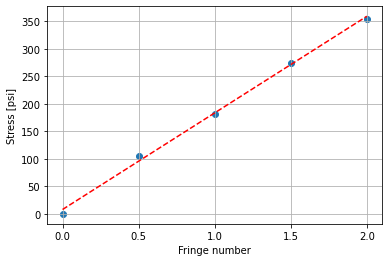

In [7]:
plt.scatter(fringe_location, sigma)
plt.xlabel('Fringe number')
plt.ylabel('Stress [psi]')
plt.grid()
z = np.polyfit(fringe_location, sigma, 1)
p = np.poly1d(z)
plt.plot(fringe_location,p(fringe_location),"r--")
plt.xticks(np.linspace(0,2,5))
plt.show()

In [8]:
#Equation of trendline
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

y=175.440694x+(8.010273)


In [9]:
slope = z[0]

In [10]:
#fringe constant
f_sigma = slope*thickness
print(f_sigma)

37.98291024072136


## 4. Calculate stress at each fringe location for beams using fringe constant

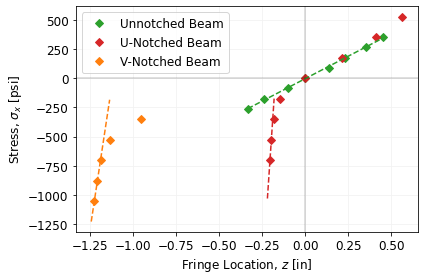

In [11]:
# store fringe number and location data in an array
# (fringe number n, location z)
z_u_notch = np.array(([-4, 0.015-0.221],[-3,0.023-0.221],[-2,0.039-0.221],[-1,0.075-0.221],
                      [0, 0.221-0.221], [1, 0.436-0.221], [2, 0.629-0.221], [3, 0.783-0.221]))

z_no_notch = np.array(([-1.5,0.187-0.522],[-1, 0.284-0.522], [-0.5,0.422-0.522],
                       [0,0], [0.5,0.657-0.522],[1,(0.754-0.522)],[1.5,.872-.522], [2,(0.973-0.522)]))

# use extrapolation to locate the n=0 fringe
n_v_notch = np.array([2,3,4,5,6])
location_v_notch=np.array([.289,.107,.057,.036,.018])

ext_poly = np.polyfit(n_v_notch, location_v_notch, 3)
ext_locations = np.polyval(ext_poly,np.linspace(-2,8,50))
location_0 = np.polyval(ext_poly,0)

# # plot to verify extrapolation curve fit (comment out the bottom plot stuff first)
# print(location_0)
# fig = plt.figure(figsize=(6,4), tight_layout=True)
# ax1 = fig.add_subplot(111)

# ax1.plot(n_v_notch, location_v_notch, 'D', color='tab:green')
# ax1.plot(np.linspace(-2,8,50), ext_locations, '-', color='tab:blue')

# ax1.plot(0, location_0, 'D', color='tab:red')

z_v_notch = np.array(([-2, 0.289-location_0], [-3, 0.107-location_0], 
                      [-4, 0.057-location_0], [-5, 0.036-location_0], [-6, 0.018-location_0]))


# calculate stress from fringe number
h = thickness
def fringe_stress(n):
    return n*f_sigma/h

# curve fit each line

# locations of notches
tip_u_notch = -0.221
tip_v_notch = -location_0

# these are the range of distances to use 
fit_no_notch_z = np.linspace(z_no_notch[0,1], z_no_notch[-1,1], 50)
fit_u_notch_z = np.linspace(tip_u_notch, z_u_notch[2,1], 50)
fit_v_notch_z = np.linspace(tip_v_notch, 0.107-location_0, 50)

# these are the y-values of the curve fit. indices only take the fringe data close to the notch 
fit_no_notch = np.polyval(np.polyfit(z_no_notch[:,1],fringe_stress(z_no_notch[:,0]),1),fit_no_notch_z)
fit_u_notch = np.polyval(np.polyfit(z_u_notch[:2,1],fringe_stress(z_u_notch[:2,0]),1),fit_u_notch_z)
fit_v_notch = np.polyval(np.polyfit(np.array([0.018-location_0,0.036-location_0]),fringe_stress(np.array([-6,-5])),1),fit_v_notch_z)


# plot
fig = plt.figure(figsize=(6,4), tight_layout=True)
ax1 = fig.add_subplot(111)

ax1.plot(z_no_notch[:,1], fringe_stress(z_no_notch[:,0]), 'D', color='tab:green', label=r'Unnotched Beam')
ax1.plot(z_u_notch[:,1], fringe_stress(z_u_notch[:,0]), 'D', color='tab:red', label=r'U-Notched Beam')
ax1.plot(z_v_notch[:,1], fringe_stress(z_v_notch[:,0]), 'D', color='tab:orange', label=r'V-Notched Beam')

ax1.plot(fit_no_notch_z, fit_no_notch, '--', color='tab:green')
ax1.plot(fit_u_notch_z, fit_u_notch, '--', color='tab:red')
ax1.plot(fit_v_notch_z, fit_v_notch, '--', color='tab:orange')

ax1.set_xlabel( r'Fringe Location, $z$ [in]',fontsize=12)
ax1.set_ylabel( r'Stress, $\sigma_x$ [psi]',fontsize=12)

ax1.legend(fontsize=12)
ax1.tick_params(labelsize=12)
ax1.grid(color='0.95')
ax1.axvline(0,color='k',linewidth=0.25)
ax1.axhline(0,color='k',linewidth=0.25)

plt.savefig('stress_vs_location.png')

In [12]:
# curve fit to calculate experimental max stress at tip
calc_stress_u = np.polyval(np.polyfit(z_u_notch[:2,1],fringe_stress(z_u_notch[:2,0]),1),tip_u_notch)
calc_stress_v = np.polyval(np.polyfit(np.array([0.018-location_0,0.036-location_0]),fringe_stress(np.array([-6,-5])),1),tip_v_notch)

print(calc_stress_u, '= U-tip')
print(calc_stress_v, '= V-tip')

-1030.7140769710763 = U-tip
-1228.0848576676635 = V-tip


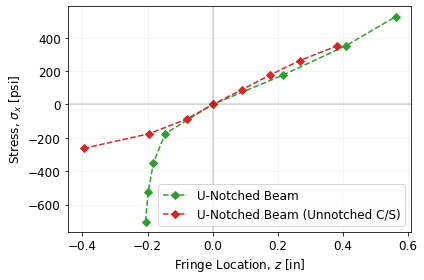

In [13]:
# (fringe number n, location z)
z_u_notch = np.array(([-4, 0.015-0.221],[-3,0.023-0.221],[-2,0.039-0.221],[-1,0.075-0.221],
                      [0, 0.221-0.221], [1, 0.436-0.221], [2, 0.629-0.221], [3, 0.783-0.221]))

z_u_notch_far = np.array(([-1.5,0.214-0.610],[-1,0.415-0.610],[-0.5,0.530-0.610],
                         [0,0.610-0.610],[0.5,0.699-0.610],[1,0.785-0.610],[1.5,0.877-0.610],[2,0.992-0.610]))

# plot
fig = plt.figure(figsize=(6,4), tight_layout=True)
ax1 = fig.add_subplot(111)

ax1.plot(z_u_notch[:,1], fringe_stress(z_u_notch[:,0]), 'D--', color='tab:green', label=r'U-Notched Beam')
ax1.plot(z_u_notch_far[:,1], fringe_stress(z_u_notch_far[:,0]), 'D--', color='tab:red', label=r'U-Notched Beam (Unnotched C/S)')

ax1.set_xlabel( r'Fringe Location, $z$ [in]',fontsize=12)
ax1.set_ylabel( r'Stress, $\sigma_x$ [psi]',fontsize=12)

ax1.legend(fontsize=12)
ax1.tick_params(labelsize=12)
ax1.grid(color='0.95')
ax1.axvline(0,color='k',linewidth=0.25)
ax1.axhline(0,color='k',linewidth=0.25)

plt.savefig('notch_vs_unnotched.png')

## 5. Calculate theoretical stress

In [14]:
Uh = 0.256
Ur = 0.065
UD = 0.9975
Ut = 0.2165
Ud = UD-Uh
a = Uh/Ur
b = Uh/UD
MU = 15.6
a

3.9384615384615382

In [15]:
UC1 = 2.966+0.502*a-0.009*a**2
UC2 = -6.475-1.126*a+0.019*a**2
UC3 = 8.023+1.253*a-0.020*a**2
UC4 = -3.572-0.634*a+0.010*a**2
K_t1 = UC1+UC2*b+UC3*b**2+UC4*b**3

In [16]:
u_stress_nom = 6*MU/(Ut*Ud**2)
u_stress_max = K_t1 * u_stress_nom

In [17]:
Vh = 0.25
Vr = 0.00984
VD = 0.9975
Vt = 0.2165
Vd = VD-Vh
c = Vh/Vr
d = Vh/VD
MV = 1
c

25.40650406504065

In [18]:
VC1 = 2.966+0.502*c-0.009*c**2
VC2 = -6.475-1.126*c+0.019*c**2
VC3 = 8.023+1.253*c-0.020*c**2
VC4 = -3.572-0.634*c+0.010*c**2
K_t2 = VC1+VC2*d+VC3*d**2+VC4*d**3

In [19]:
v_stress_nom = 6*MV/(Vt*Vd**2)
v_stress_max = K_t2 * v_stress_nom

1289.859621108826

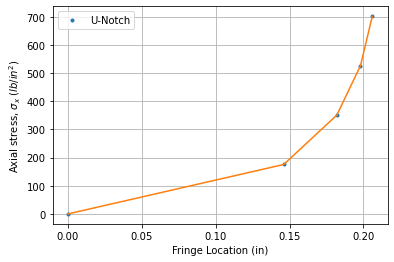

In [20]:
ulocation = np.array([0,0.146,0.182,0.198,0.206])
ustress = np.array([0,175.441,350.881,526.322,701.7630])
plt.plot(ulocation, ustress, '.', label="U-Notch")
p = np.polyfit(ulocation,ustress,4)
plt.plot(ulocation,p[0]*ulocation**4+p[1]*ulocation**3+p[2]*ulocation**2+p[3]*ulocation**1)
x = p[0]*0.221**4+p[1]*0.221**3+p[2]*0.221**2+p[3]*0.221**1
plt.xlabel("Fringe Location (in)")
plt.ylabel("Axial stress, $\sigma_x$ $(lb/in^2)$")
plt.legend()
plt.grid()
x

1039.3553621851909

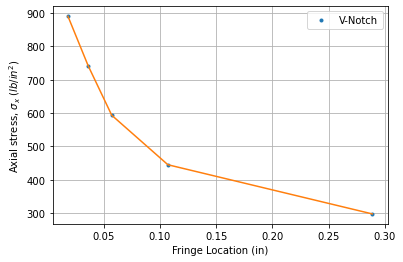

In [21]:
vlocation = np.array([0.289,0.107,0.057,0.036,0.018])
vstress = np.array([297.719,445.078,593.437,741.797,890.156])
plt.plot(vlocation, vstress,'.', label="V-Notch")
o = np.polyfit(vlocation,vstress,4)
plt.plot(vlocation,o[0]*vlocation**4+o[1]*vlocation**3+o[2]*vlocation**2+o[3]*vlocation+o[4])
x = o[0]*0**4+o[1]*0**3+o[2]*0**2+o[3]*0**1+o[4]
plt.xlabel("Fringe Location (in)")
plt.ylabel("Axial stress, $\sigma_x$ $(lb/in^2)$")
plt.legend()
plt.grid()
x